In [25]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

# Dataset Titanic           

La base de données **"Titanic"** est disponible sur Kaggle (https://www.kaggle.com/competitions/titanic/data). Elle contient les informations des passagers du RMS *Titanic* et sert d'exemple classique pour des problèmes de classification binaire. 


## Contenu du dataset

La base contient les colonnes suivantes. 

**PassengerId**

Identifiant unique de chaque passager. 

**Survived**

Variable cible (0 = Non, 1 = Oui). 

**Pclass**

Classe du billet : 1 = 1re classe, 2 = 2e, 3 = 3e. Indicateur du statut socio-économique (SSE). 

**Name**

Nom complet du passager. Contient souvent un titre (`Mr`, `Mrs`, `Miss`, `Master`, `Dr`, etc.). 

**Sex**

Sexe du passager (`male` / `female`). 

**Age**

Âge en années. Peut être fractionnaire (ex. 0.42 pour des nourrissons).

**SibSp**

Nombre de frères/soeurs et conjoints à bord. 

**Parch**

Nombre de parents/enfants à bord.  

**Ticket**

Numéro de billet. 

**Fare**

Tarif payé. 

**Cabin**

Numéro de cabine (ex. C85).

**Embarked**

Port d’embarquement (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton).



## Objectif de l'analyse

Construire un **modèle de classification binaire** pour prédire si un passager du Titanic a survécu (1) ou non (0) à partir des caractéristiques disponibles. Les étapes concrètes :



## Format de soumission

Le fichier de soumission doit contenir exactement deux colonnes : `PassengerId` et `Survived` (0 ou 1). Sauvegarde en CSV sans index, par exemple :

```python
submission.to_csv('submission.csv', index=False)
```



## Prétraitement

In [26]:

# Chargement des données
titanic=pd.read_csv("train (2).csv")

In [27]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Affichage des informations générales sur le DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# Affichage des statistiques descriptives du DataFrame
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(titanic.nunique())

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [31]:

# Affichage du nombre de valeurs manquantes pour chaque variable
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [32]:
# Extraction du titre depuis la colonne "Name"
titanic['Title'] = titanic['Name'].str.extract(r',\s*([^\.]+)\.')
# Regrouper les titres rares et normaliser
titanic['Title'] = titanic['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Master'], 'Mr')
titanic['Title'] = titanic['Title'].replace({'the Countess': 'Miss', 'Countess': 'Miss', 'Mlle': 'Miss', 'Lady': 'Miss', 'Ms': 'Miss','Dona':'Miss', 'Mme': 'Mrs'})
# Visualiser la distribution des titres
print(titanic['Title'].value_counts())

Title
Mr      578
Miss    187
Mrs     126
Name: count, dtype: int64


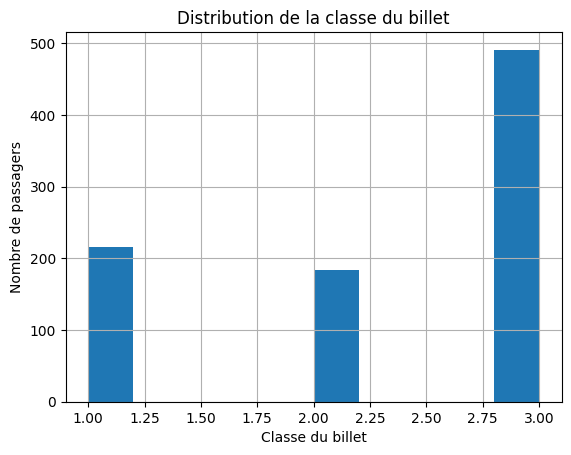

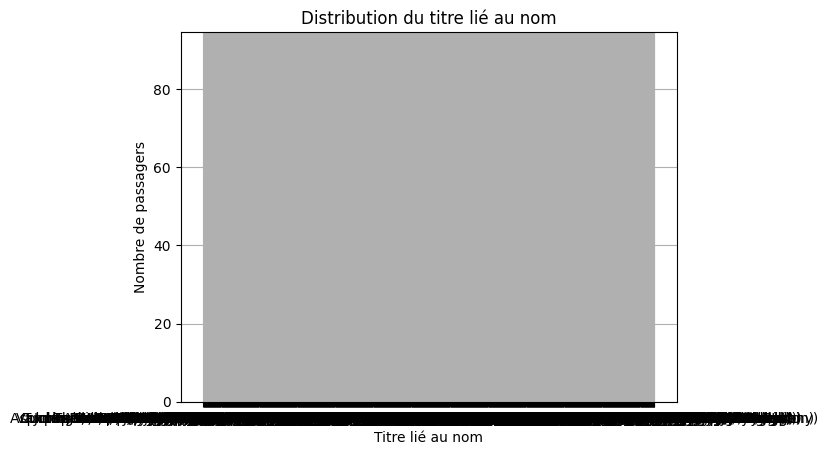

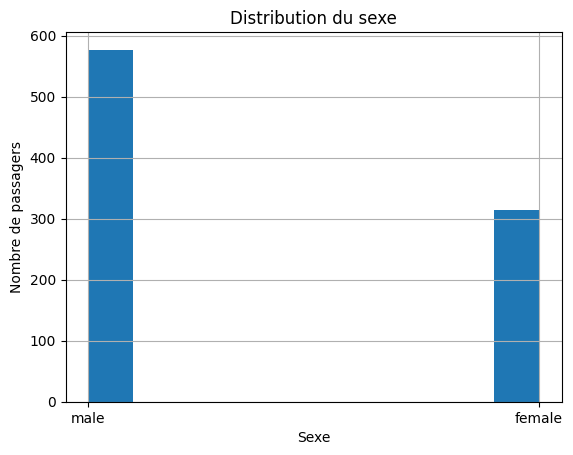

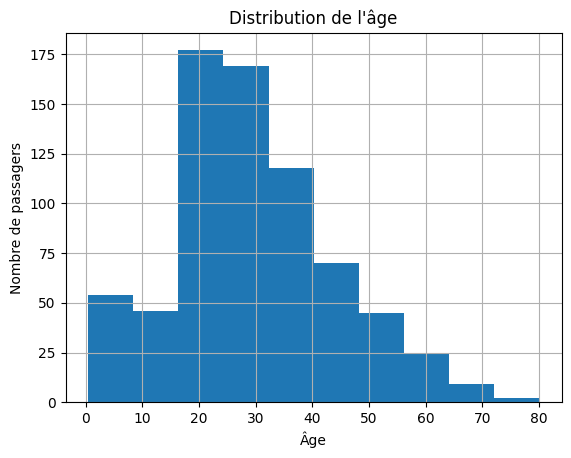

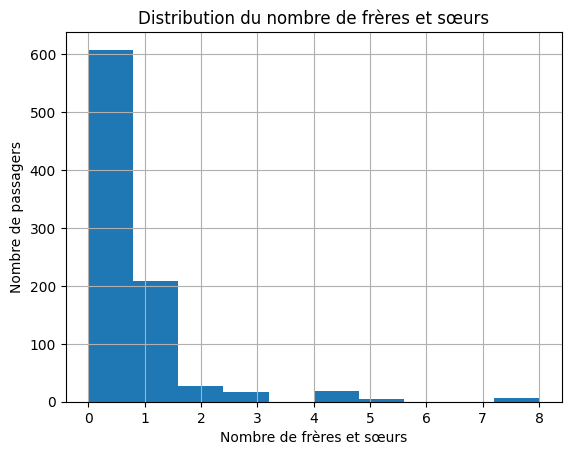

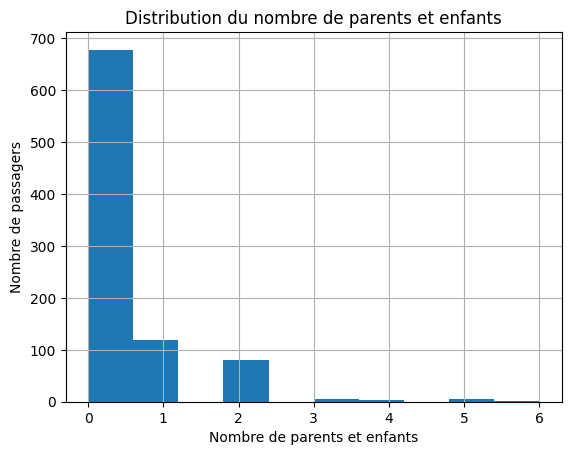

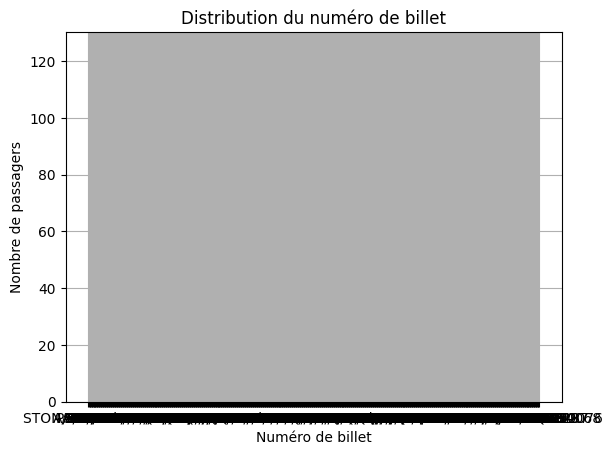

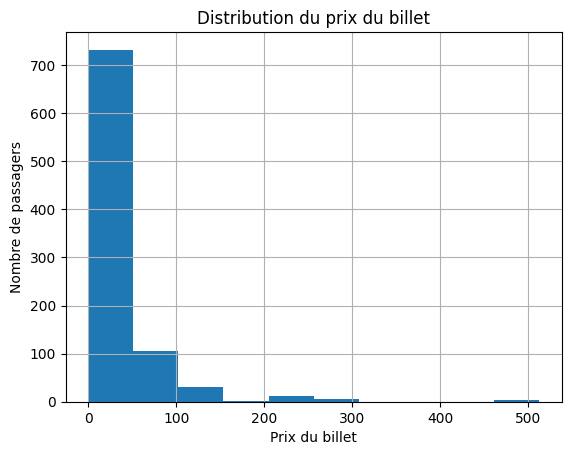

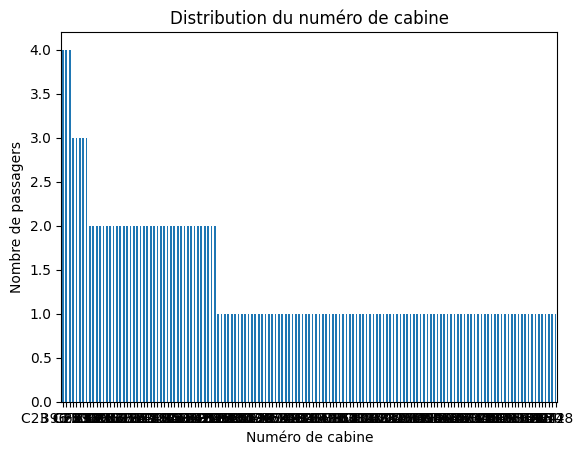

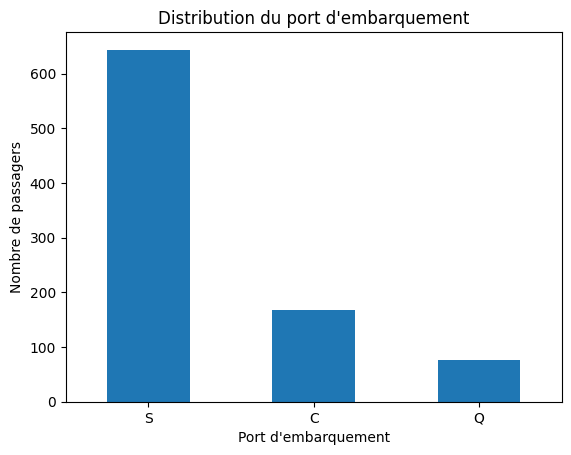

In [33]:
# Histogramme de la variable 'Pclass'
titanic['Pclass'].hist()
plt.title('Distribution de la classe du billet')
plt.xlabel('Classe du billet')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Name'
titanic['Name'].hist()
plt.title('Distribution du titre lié au nom')
plt.xlabel('Titre lié au nom')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Sex'
titanic['Sex'].hist()
plt.title('Distribution du sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Age'
titanic['Age'].hist()
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'SibSp'
titanic['SibSp'].hist()
plt.title('Distribution du nombre de frères et sœurs')
plt.xlabel('Nombre de frères et sœurs')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Parch'
titanic['Parch'].hist()
plt.title('Distribution du nombre de parents et enfants')
plt.xlabel('Nombre de parents et enfants')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Ticket'
titanic['Ticket'].hist()
plt.title('Distribution du numéro de billet')
plt.xlabel('Numéro de billet')
plt.ylabel('Nombre de passagers')
plt.show()

# Histogramme de la variable 'Fare'
titanic['Fare'].hist()
plt.title('Distribution du prix du billet')
plt.xlabel('Prix du billet')
plt.ylabel('Nombre de passagers')
plt.show()

# Diagramme en barres de la variable 'Cabin'
titanic['Cabin'].value_counts().plot(kind='bar')
plt.title('Distribution du numéro de cabine')
plt.xlabel('Numéro de cabine')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

# Diagramme en barres de la variable 'Embarked'
titanic['Embarked'].value_counts().plot(kind='bar')
plt.title('Distribution du port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

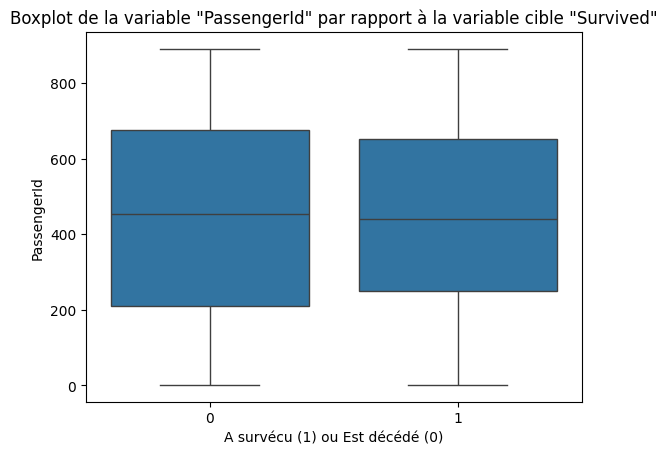

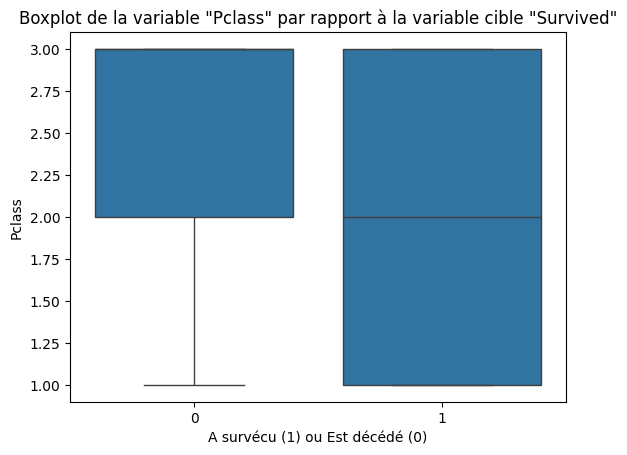

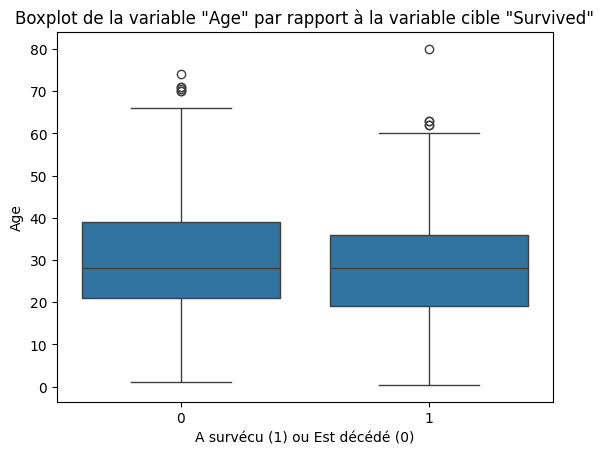

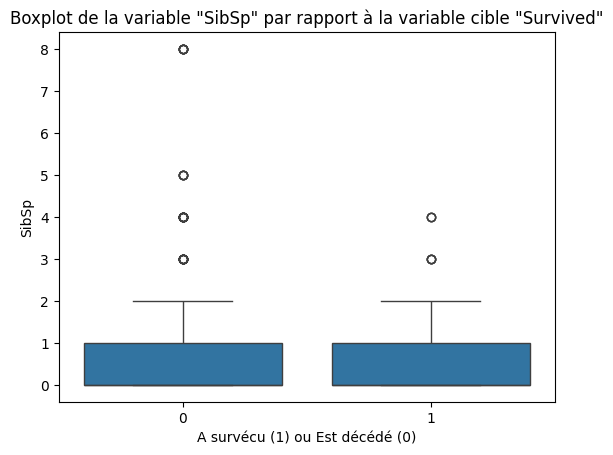

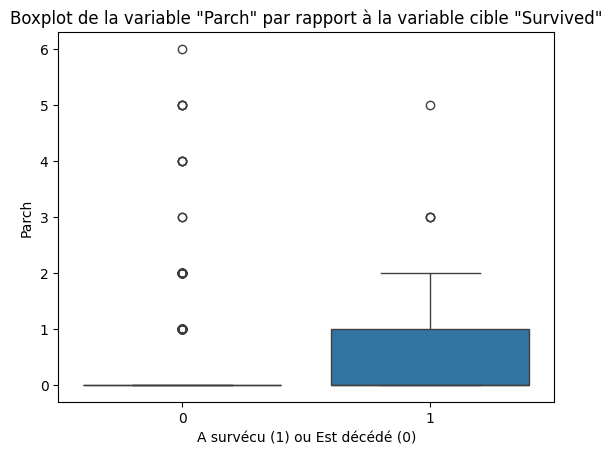

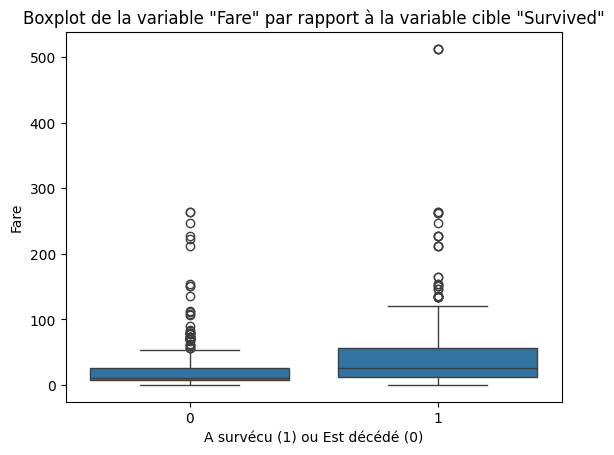

In [34]:
# Génération des boxplots bivariés pour chaque variable numérique sur des graphiques séparés
for col in ['PassengerId','Pclass',   'Age', 'SibSp', 'Parch',  'Fare']:
    sns.boxplot(data=titanic, x='Survived', y=col)
    plt.title(f'Boxplot de la variable "{col}" par rapport à la variable cible "Survived"')
    plt.xlabel('A survécu (1) ou Est décédé (0)')
    plt.ylabel(col)
    plt.show()   
   

In [35]:
# Calcul des statistiques de test de Kruskal-Wallis et des p-valeurs pour chaque variable numérique
num_vars = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

from scipy.stats import kruskal
p_values = []
for col in num_vars:
    h, pval = kruskal(titanic[col][titanic['Survived']==0], titanic[col][titanic['Survived']==1])
    p_values.append(pval)

    # Création d'une liste pour stocker les valeurs de significativité
is_significant = []

# Vérification de la significativité pour chaque p-valeur et stockage dans la liste is_significant
for pval in p_values:
    if pval < 0.05:
        is_significant.append('Oui')
    else:
        is_significant.append('Non')

# Affichage des résultats dans un tableau
result_table = pd.DataFrame({'Variable': num_vars, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)

                  P-value Significative
Variable                               
PassengerId  8.812672e-01           Non
Pclass       3.932786e-24           Oui
Age                   NaN           Non
SibSp        8.012801e-03           Oui
Parch        3.709598e-05           Oui
Fare         4.547532e-22           Oui


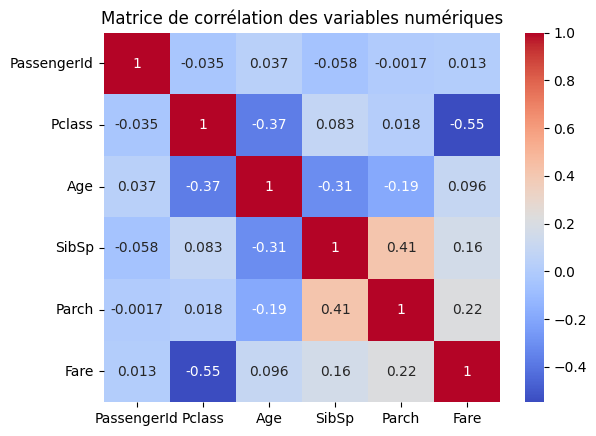

In [36]:
# Sélection des variables numériques
num_vars = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_num = titanic[num_vars]

# Génération de la matrice de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

## Mise en place du modèle

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# Sélection des variables prédictives (inclut 'Title')
X = titanic.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)
# Imputation des valeurs manquantes
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

# Encodage des variables catégorielles (inclut 'Title')
X = pd.get_dummies(X, columns=['Sex','Embarked','Title'], drop_first=True)

# Variable cible
y = titanic['Survived'] # Variable cible

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

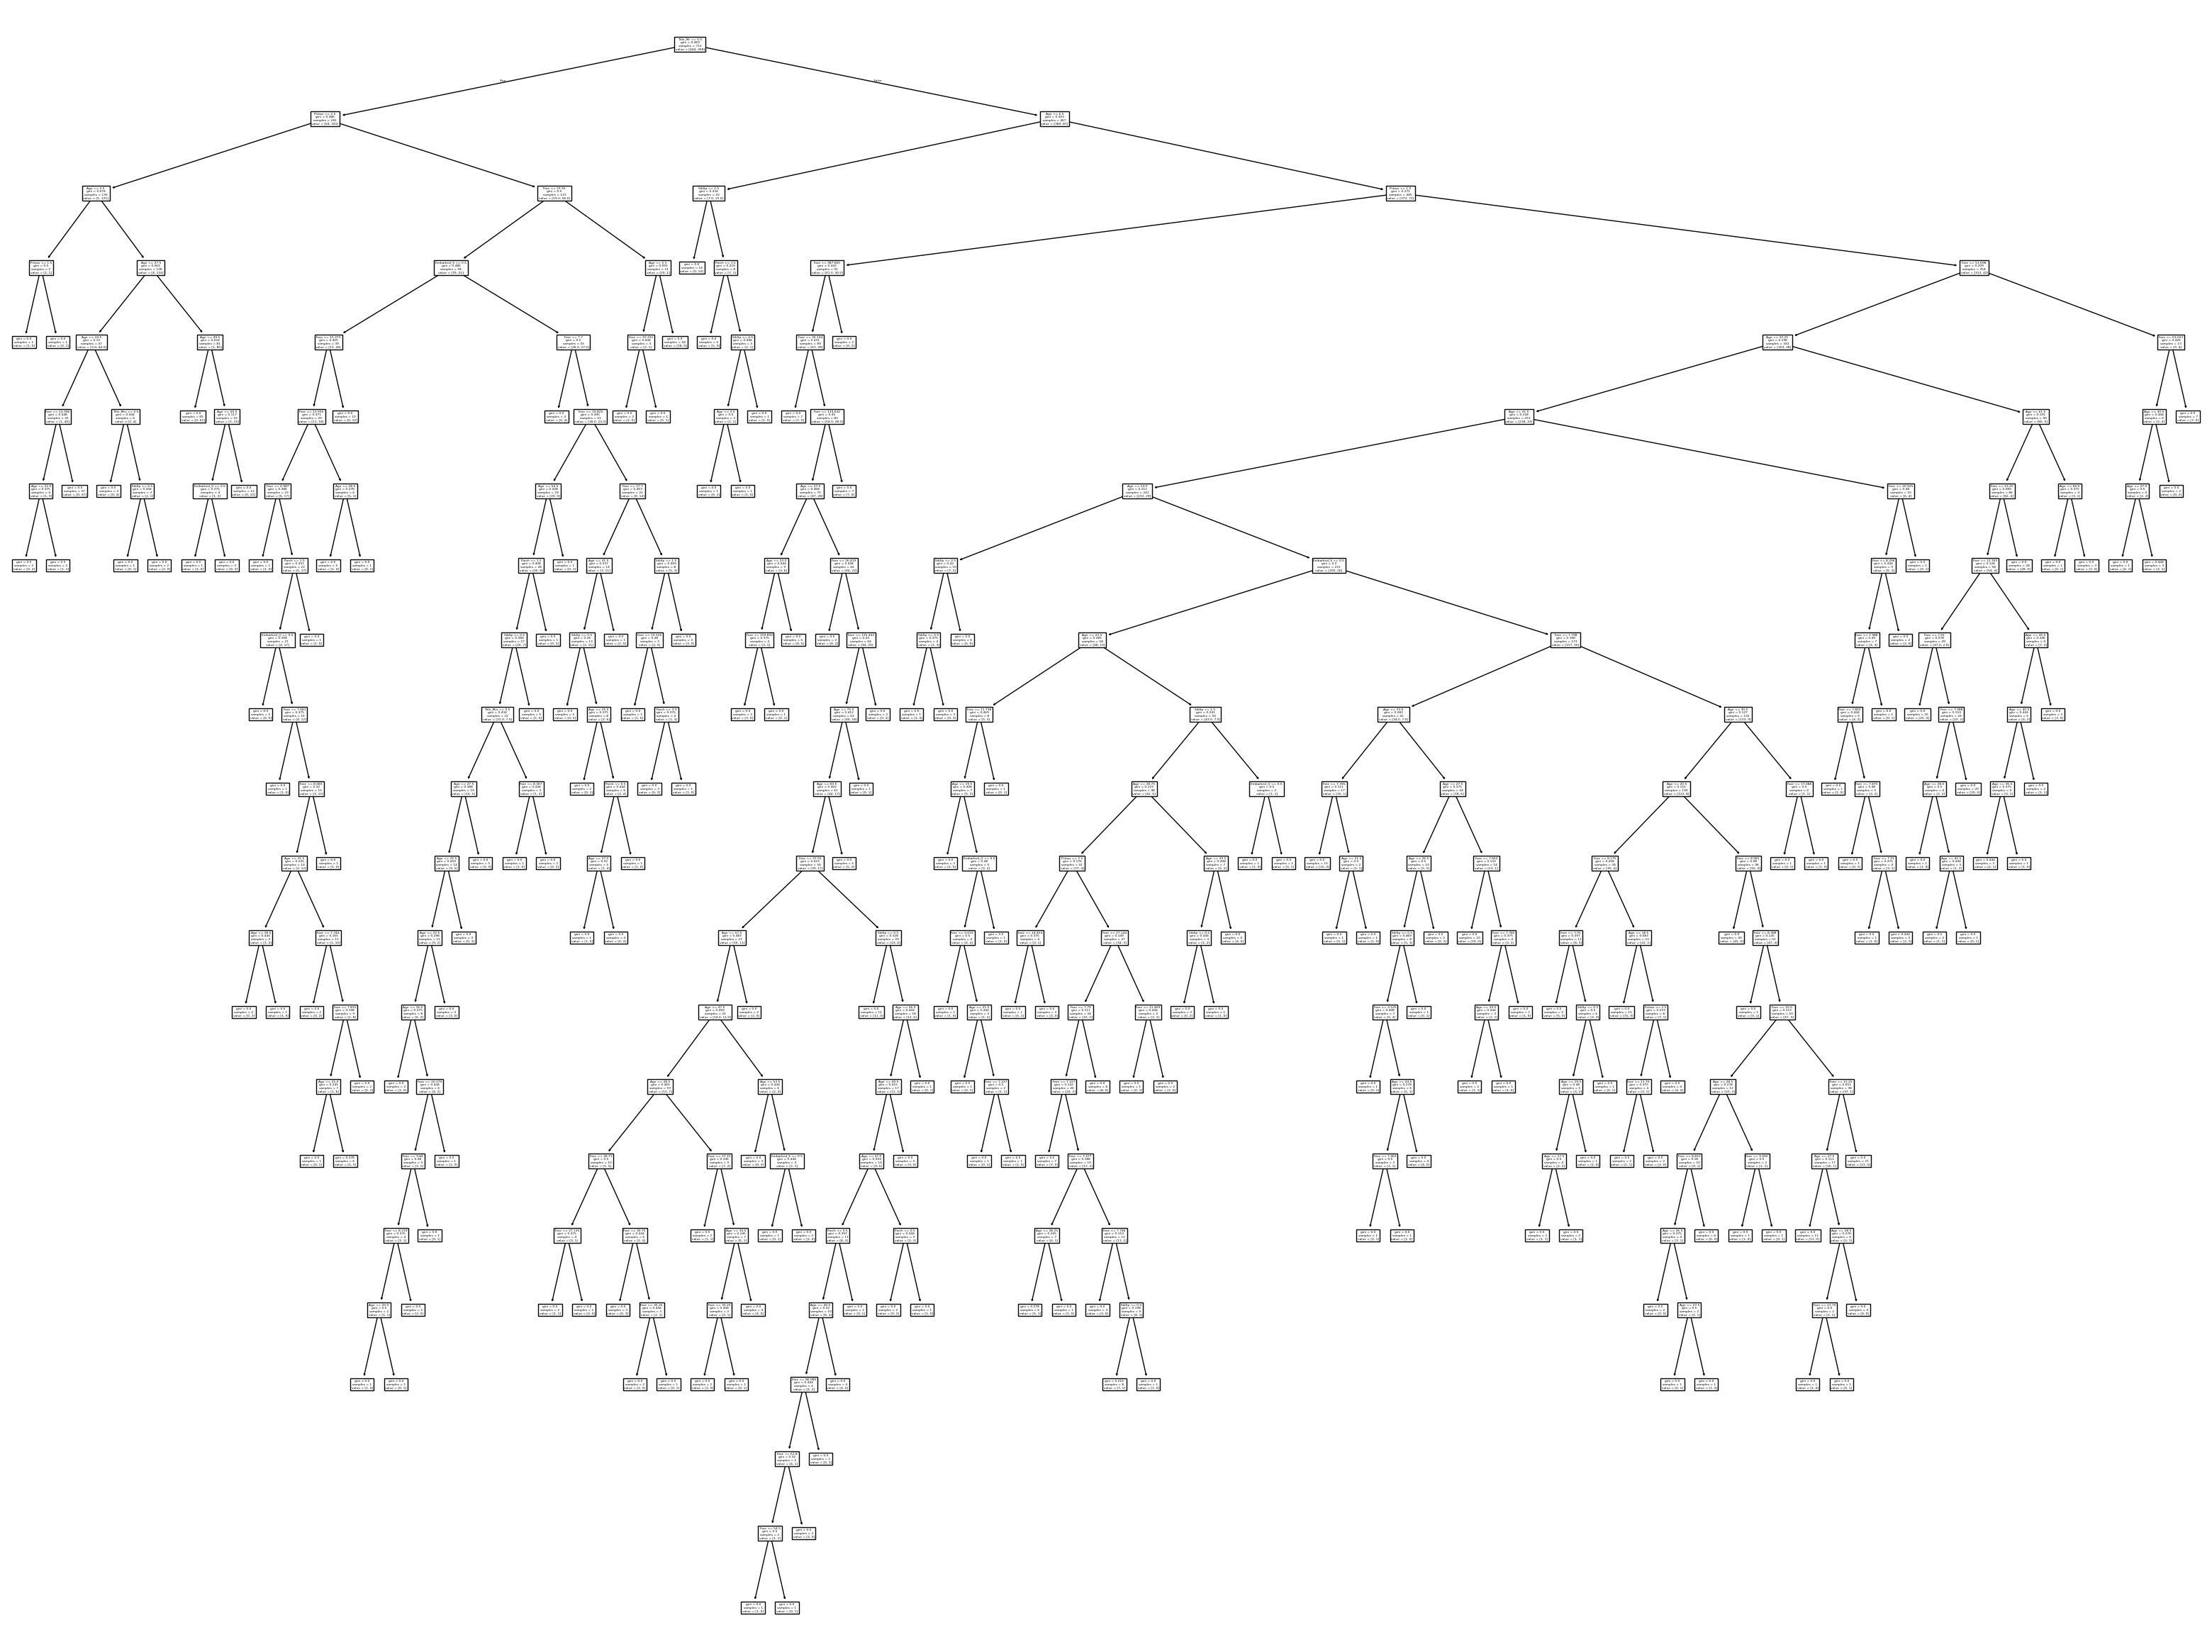

In [41]:
plt.figure(figsize=(40,30))
plot_tree(tree, feature_names=X.columns)
plt.show()

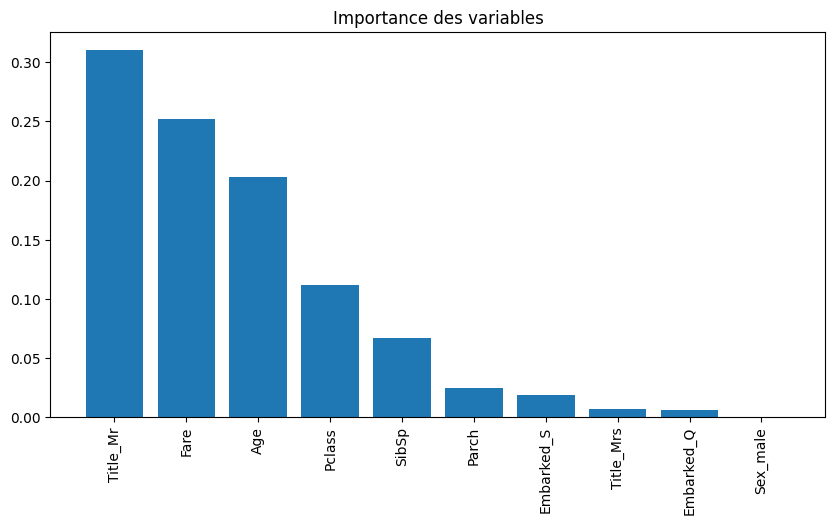

In [42]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

## Evaluation du modèle

In [43]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)

# Évaluation des performances sur l'ensemble de test
print('Performance sur la base test')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification = classification_report(y_test, y_test_pred)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance sur la base apprentissage
Train Accuracy :  0.9789325842696629
Train Confusion matrix : 
 [[443   1]
 [ 14 254]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       444
           1       1.00      0.95      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712

Performance sur la base test
Test Accuracy :  0.7932960893854749
Test Confusion matrix : 
 [[87 18]
 [19 55]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



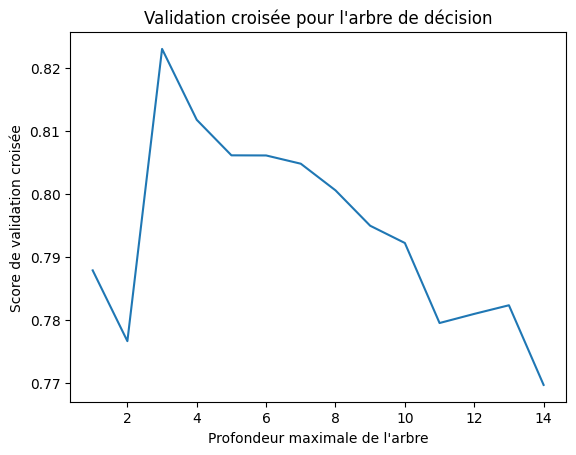

In [44]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

In [ ]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 3


In [47]:

# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

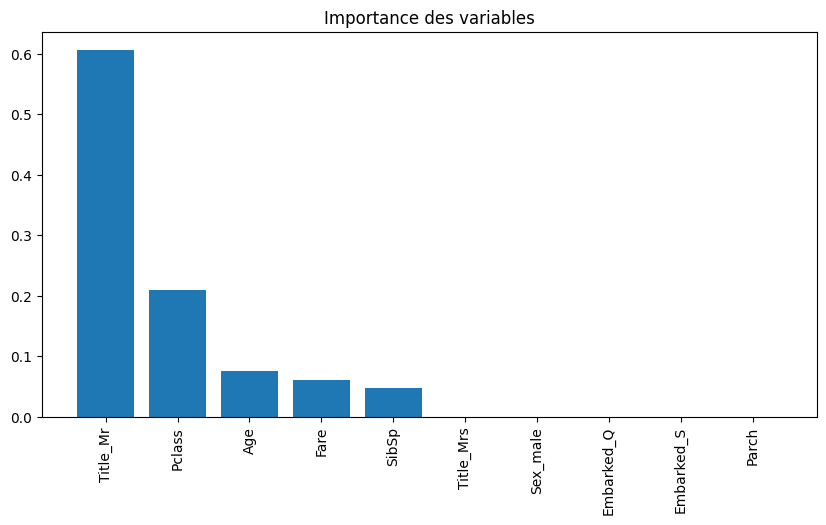

In [ ]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [ ]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)

# Évaluation des performances sur l'ensemble de test
print('Performance sur la base test')
test_accuracy = accuracy_score(y_test, y_test_pred)
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification = classification_report(y_test, y_test_pred)

print('Test Accuracy : ', test_accuracy)
print('Test Confusion matrix : \n', test_confusion)
print('Test Classification report : \n', test_classification)

Performance sur la base apprentissage
Train Accuracy :  0.8342696629213483
Train Confusion matrix : 
 [[401  43]
 [ 75 193]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       444
           1       0.82      0.72      0.77       268

    accuracy                           0.83       712
   macro avg       0.83      0.81      0.82       712
weighted avg       0.83      0.83      0.83       712

Performance sur la base test
Test Accuracy :  0.7932960893854749
Test Confusion matrix : 
 [[92 13]
 [24 50]]
Test Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Interprétation 

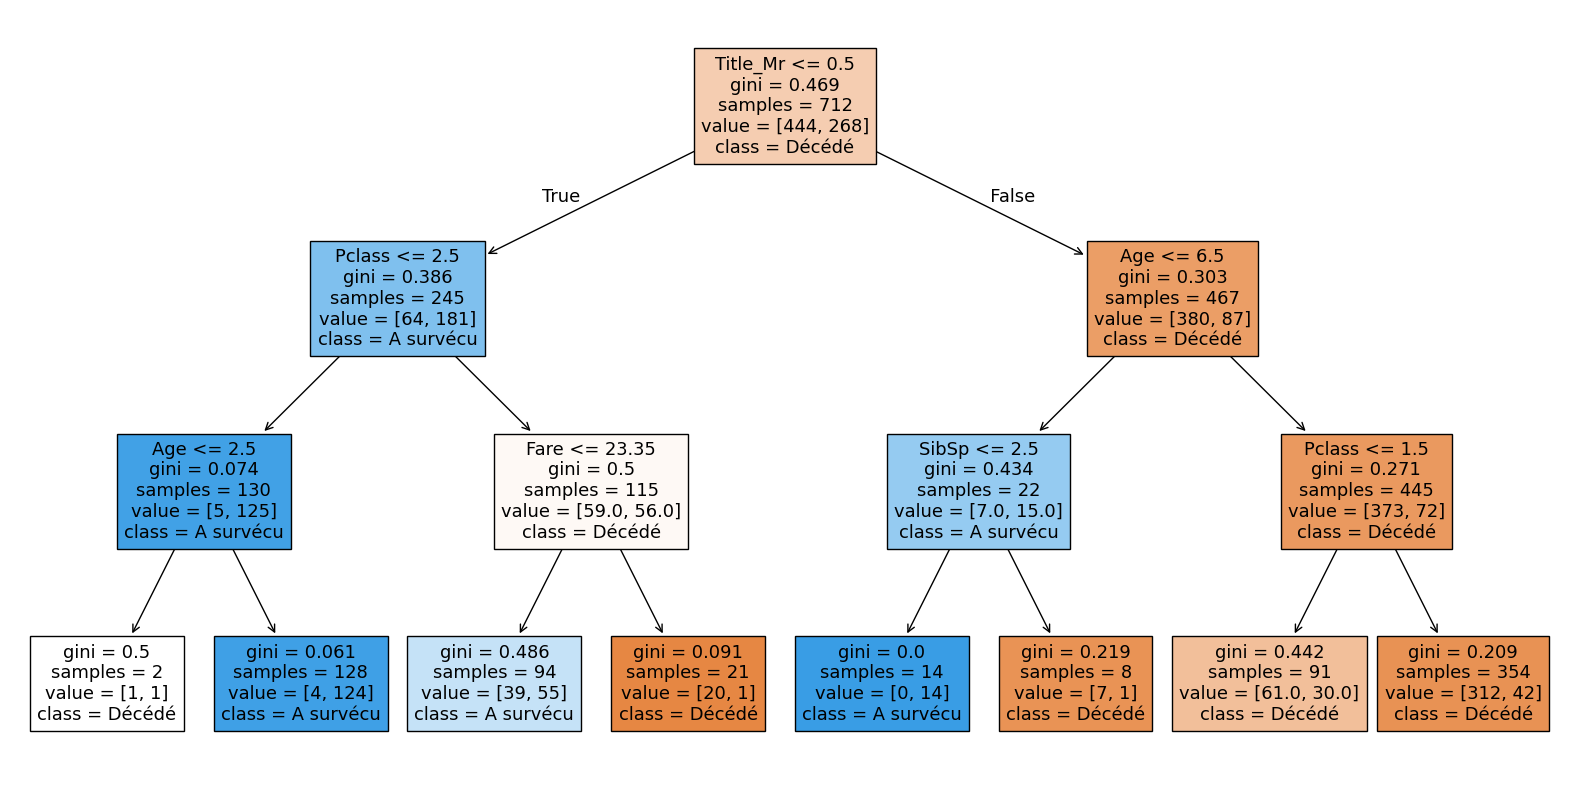

In [49]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=['Décédé', 'A survécu'], filled=True)
plt.show()